In [1]:
# goal: to visualize structure in high-dimensional data

import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = load_iris()
iris_data, iris_target = iris.data, iris.target
print(np.unique(iris_target))

[0 1 2]


Mapping each observation onto a function (finite Fourier series functional form):



In [3]:
# 1, source: https://glowingpython.blogspot.com/2014/10/andrews-curves.html

def andrew_curve4(x, theta):
    
    base_functions = [lambda x: x[0]/np.sqrt(2.), 
                      lambda x: x[1]*np.sin(theta), 
                      lambda x: x[2]*np.cos(theta), 
                      lambda x: x[3]*np.sin(2.*theta)]
    curve = np.zeros(len(theta))
    for f in base_functions:
        curve = curve + f(x)
    return curve

(-3.141592653589793, 3.141592653589793)

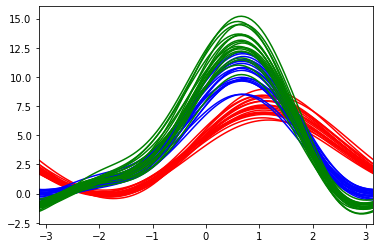

In [4]:
theta = np.linspace(-np.pi, np.pi, 100)

for ex in iris_data[:20]: # setosa
    pl.plot(theta, andrew_curve4(ex, theta), 'r')

for ex in iris_data[50:70]: # versicolor
    pl.plot(theta, andrew_curve4(ex, theta), 'b')

for ex in iris_data[100:120]: # virginica
    pl.plot(theta, andrew_curve4(ex, theta), 'g')

pl.xlim(-np.pi, np.pi)

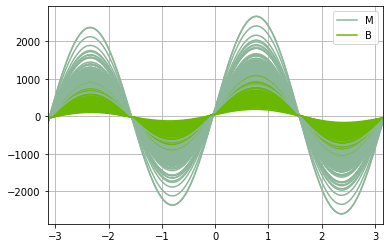

In [5]:
# 2, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.andrews_curves.html

cancer = pd.read_csv('cancer.csv')
cancer = cancer[cancer.columns[0:8]]
andrews_curves(cancer.drop('id', axis=1), 'diagnosis')

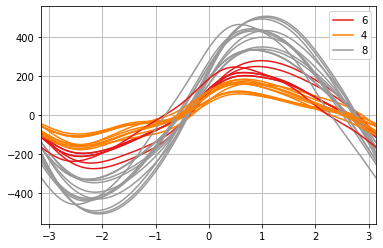

In [6]:
# 3, https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#49.-Andrews-Curve

mtcars = pd.read_csv('mtcars.csv')
mtcars.drop(['cars', 'carname'], axis=1, inplace=True)
andrews_curves(mtcars, 'cyl', colormap='Set1')

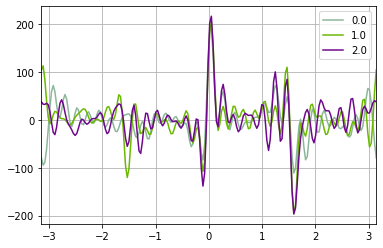

In [7]:
digits = load_digits()
digits_data, digits_target = digits.data, digits.target
data = pd.DataFrame(np.column_stack([digits_data, digits_target]))
andrews_curves(data.loc[:2], 64)